In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.impute import SimpleImputer  
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import SVC  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load the Dataset

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##  Check basic info

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')

print("Shape of the dataset:", df.shape)
print("\nColumn names:")
display(df.columns)
print("\ndescribe:")
print(df.describe())
print("\nFirst 5 rows of the dataset:")
display(df.head())

Shape of the dataset: (7043, 21)

Column names:


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


describe:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Check for missing values

In [4]:
print(df.isnull().sum())

df = df.drop('customerID', axis=1)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df = df.fillna(df.median(numeric_only=True))

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## Convert Categorical Columns using One-Hot Encoding

In [5]:
df = pd.get_dummies(df, drop_first=True)
display(df.head())


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [10]:
import numpy as np

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now perform the division
df['AvgMonthlySpend'] = df['TotalCharges'] / df['tenure']
df['AvgMonthlySpend'] = df['AvgMonthlySpend'].replace([np.inf, -np.inf], np.nan).fillna(0)
print(df[['TotalCharges', 'tenure', 'AvgMonthlySpend']].head()) 

   TotalCharges  tenure  AvgMonthlySpend
0         29.85       1        29.850000
1       1889.50      34        55.573529
2        108.15       2        54.075000
3       1840.75      45        40.905556
4        151.65       2        75.825000


##   Check Overall Churn Distribution

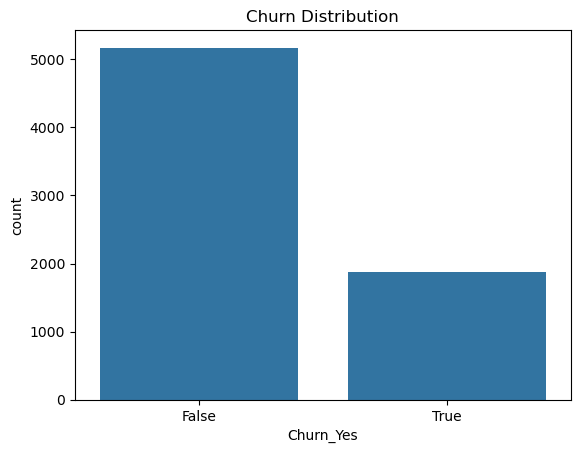

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn_Yes', data=df)
plt.title("Churn Distribution")
plt.show()


## Encode Categorical Columns

In [11]:
# Check which columns are of object type
object_cols = df.select_dtypes(include='object').columns.tolist()
print("Object Columns:", object_cols)

df = pd.get_dummies(df, columns=object_cols, drop_first=True)
display(df.head())


Object Columns: []


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,AvgMonthlySpend
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,True,False,True,False,False,29.850000
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,55.573529
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,True,False,False,True,True,54.075000
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,40.905556
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,75.825000


## Split Dataset into Training and Testing Sets

In [12]:
from sklearn.model_selection import train_test_split
# Define features and target
X = df.drop('Churn_Yes', axis=1)  # Target is Churn_Yes because of one-hot encoding
y = df['Churn_Yes']

# Split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5634, 31)
X_test shape: (1409, 31)
y_train shape: (5634,)
y_test shape: (1409,)


## Standardize Feature Values

Top 10 Important Features:

TotalCharges                      0.622355
InternetService_Fiber optic       0.594443
StreamingMovies_Yes               0.218745
StreamingTV_Yes                   0.169715
PaperlessBilling_Yes              0.163671
MultipleLines_Yes                 0.163354
PaymentMethod_Electronic check    0.152261
AvgMonthlySpend                   0.118038
SeniorCitizen                     0.058820
MultipleLines_No phone service    0.041660
dtype: float64


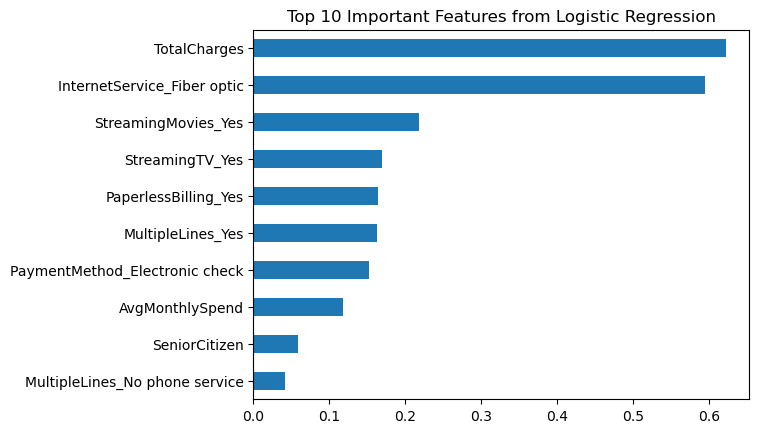

In [15]:
#Feature Importance
# View top features from logistic regression
# Make sure model is trained first

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(solver='liblinear', max_iter=2000)
model.fit(X_train_scaled, y_train)


importance = pd.Series(model.coef_[0], index=X.columns)
print("Top 10 Important Features:\n")
print(importance.sort_values(ascending=False).head(10))

importance.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Important Features from Logistic Regression")
plt.gca().invert_yaxis()
plt.show()


## Top 10 Features Affecting Churn

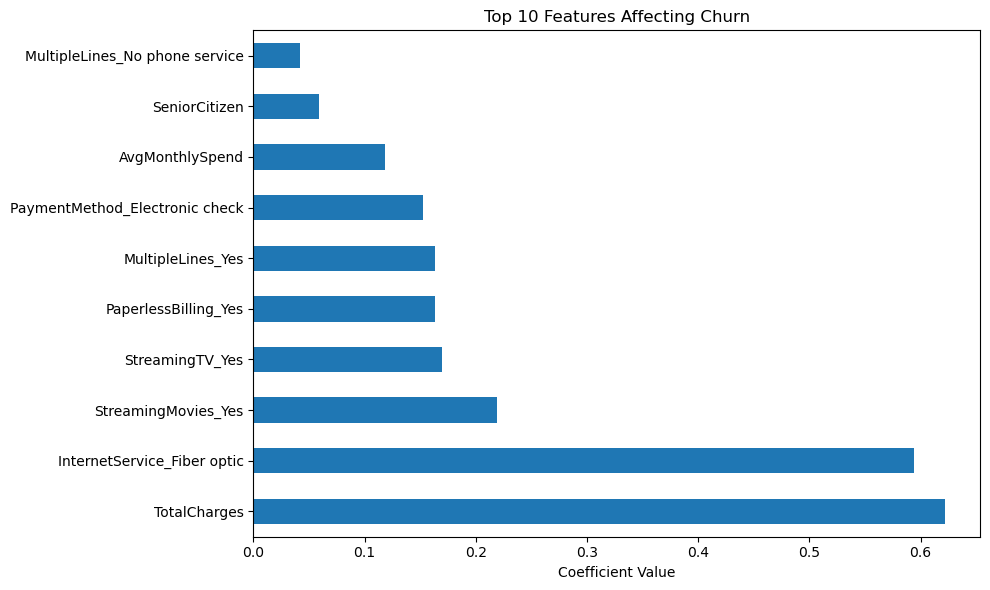

In [16]:
#Show Important Features
# Get feature importances from model coefficients
import matplotlib.pyplot as plt
import pandas as pd

importance = pd.Series(model.coef_[0], index=X.columns)
importance = importance.sort_values(ascending=False)

importance.head(10).plot(kind='barh', title='Top 10 Features Affecting Churn', figsize=(10, 6))
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

## Train and Evaluate Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)


# Predict
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8211497515968772

Confusion Matrix:
 [[935 101]
 [151 222]]

Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



## Visualize confusion matri

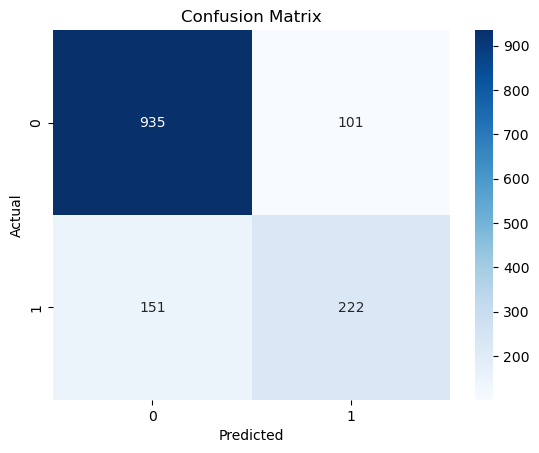

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Customer Segmentation 

In [20]:
import numpy as np

# Copy test data to add predictions
X_test_copy = X_test.copy()
X_test_copy['PredictedChurn'] = y_pred

# Segment customers
X_test_copy['Segment'] = np.where(
    X_test_copy['PredictedChurn'] == 1, 'At Risk',
    np.where((X_test_copy['tenure'] > 40) & (X_test_copy['MonthlyCharges'] < 50), 'Loyal', 'Dormant')
)

# Show counts of each segment
print(X_test_copy['Segment'].value_counts())

Segment
Dormant    938
At Risk    323
Loyal      148
Name: count, dtype: int64


## Visualize Customer Segments

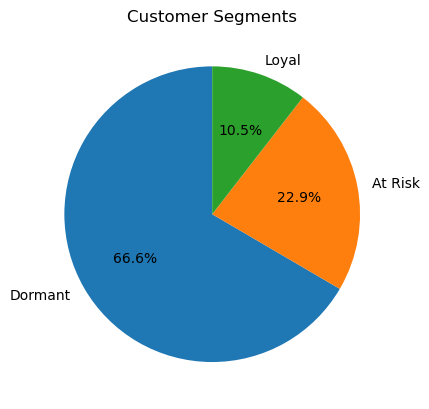

In [21]:
X_test_copy['Segment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, title='Customer Segments')
plt.ylabel('')
plt.show()


## Train vs Test Churn Distribution

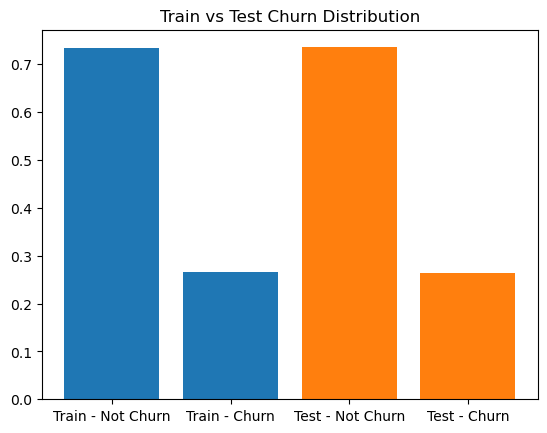

In [22]:
import matplotlib.pyplot as plt

train_dist = y_train.value_counts(normalize=True)
test_dist = y_test.value_counts(normalize=True)

plt.bar(['Train - Not Churn', 'Train - Churn'], train_dist)
plt.bar(['Test - Not Churn', 'Test - Churn'], test_dist)
plt.title("Train vs Test Churn Distribution")
plt.show()

## Visualize Train-Test Churn Distribution

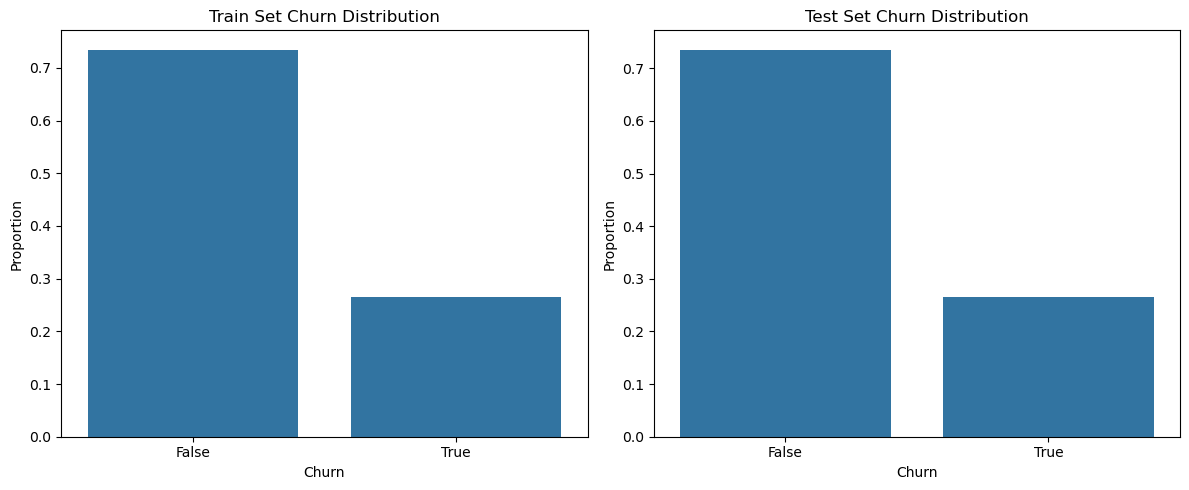

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

train_dist = y_train.value_counts(normalize=True)
test_dist = y_test.value_counts(normalize=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=train_dist.index, y=train_dist.values, ax=ax[0])
ax[0].set_title('Train Set Churn Distribution')
ax[0].set_xlabel('Churn')
ax[0].set_ylabel('Proportion')

sns.barplot(x=test_dist.index, y=test_dist.values, ax=ax[1])
ax[1].set_title('Test Set Churn Distribution')
ax[1].set_xlabel('Churn')
ax[1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

## Percentage-wise View

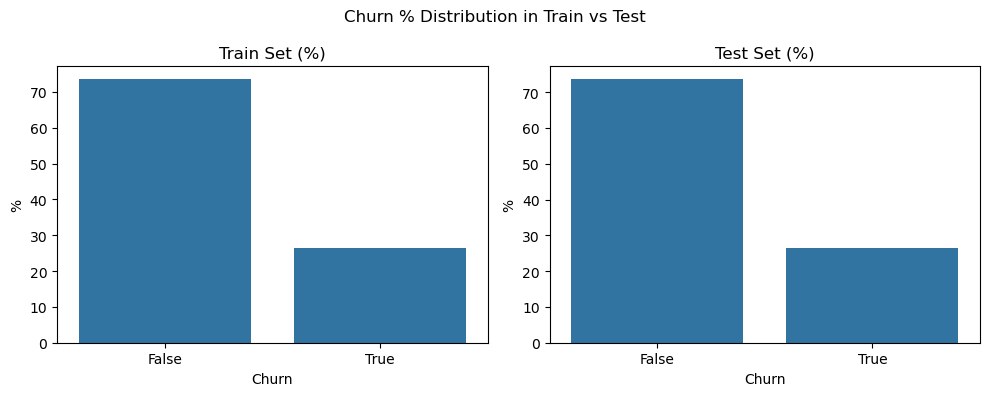

In [24]:
# Calculate percentages
train_percent = y_train.value_counts(normalize=True) * 100
test_percent = y_test.value_counts(normalize=True) * 100

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(x=train_percent.index, y=train_percent.values, ax=ax[0])
ax[0].set_title('Train Set (%)')
ax[0].set_ylabel('%')
ax[0].set_xlabel('Churn')

sns.barplot(x=test_percent.index, y=test_percent.values, ax=ax[1])
ax[1].set_title('Test Set (%)')
ax[1].set_ylabel('%')
ax[1].set_xlabel('Churn')

plt.suptitle("Churn % Distribution in Train vs Test")
plt.tight_layout()
plt.show()


## correlation heatmap

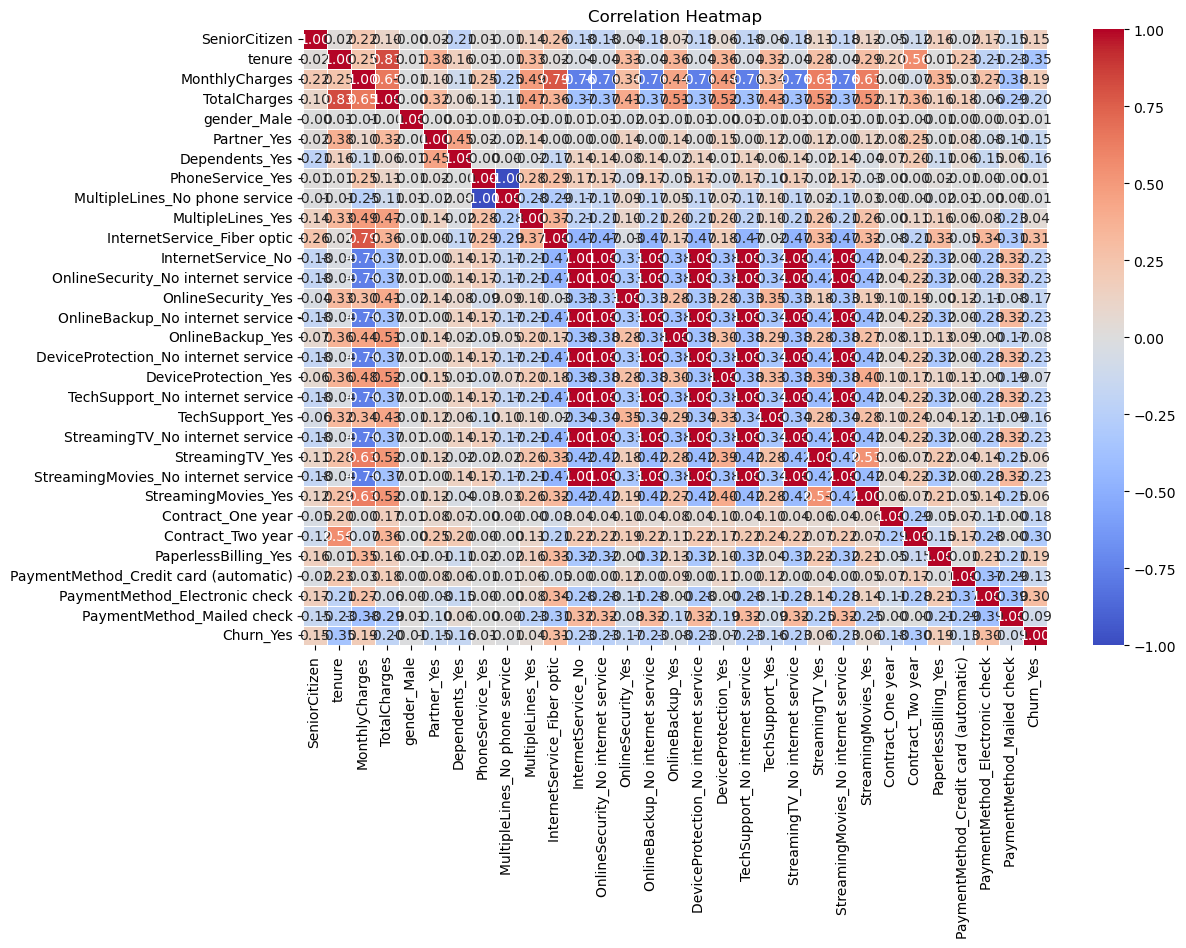

In [7]:
#correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
